# Ramsey model with hand-to-mouth households

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from RamseyModel import RamseyModelClass

## 1. Model description

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Two infinitely-lived households.

**Households:** We have two types of households: Optimizing households and hand-to-mouth households. The hand-to-mouth households differ from the optimizing (Ricardian) households in that they cannot accumulate savings and are credit-constrained. Therefore, they consume cash-on-hand in every period. Both types of households supply labor exogenously, $N_{t}=1$, and earn a wage $w_{t}$. The return on saving is $r_{t+1}$. $\lambda$ is the share of optimizing households. The problem for each household is written below.

$\;$

**Optimizing households:**
$$
\begin{aligned}
U^{Opt} & =\max_{\{C^{Opt}_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}\frac{({C_{t}}^{Opt})^{1-\sigma}}{1-\sigma},\beta\in(0,1),\sigma>0\\
 & \text{s.t.}\\[0.2cm]
 A_{t}^{Opt}&=M_{t}^{Opt}-C_{t}^{Opt} \\[0.2cm]
 M_{t}^{Opt}&=(1+r_{t})A_{t-1}^{Opt}+w_{t} N_{t} \lambda
\end{aligned}
$$

**Hand-to-mouth households:**
$$
\begin{aligned}
C_t^{Htm}=M_{t}^{Htm}=w_{t}N_{t}(1-\lambda)
\end{aligned}
$$

**Total cash-on-hand, assets and consumption:**
$$
\begin{aligned}
M_t &= M_t^{Opt} + M_t^{Htm} \\
C_t &= C_t^{Opt} + C_t^{Htm} \\
A_t &= A_t^{Opt}
\end{aligned}
$$

**Firms:** 

Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$
and hires labor $L_{t}$ at the wage rate $w_{t}$. Firms have access to the CES production function
    
$$
\begin{aligned}
Y_{t} &= F(K_{t-1},L_{t}) \\ &=\Gamma_t(\alpha K_{t-1}^{-\theta}+(1-\alpha)L_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1),\Gamma_t>0
\end{aligned}
$$

Profits are

$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Equilibrium:**

1. Hand-to-mouth households consume all cash-on-hand, $M_t^{Htm}$
2. Optimizing households maximize utility by $C_t^{Opt}$
3. Firms maximize profits, $\Pi_t$
4. Labor market clear: $L_{t}=N_{t}=1$
5. Goods market clear: $Y_{t}=C_{t}+I_{t}$
6. Asset market clear: $A_{t}=K_{t}$ and $r_{t}=r_{t}^{k}-\delta$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

$\:$

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & = F_{K}(K_{t-1},L_{t})=A_t \alpha K_{t-1}^{-\theta-1}Y_{t}^{-1}\\
w_{t} & = F_{L}(K_{t-1},L_{t})=A_t (1-\alpha)L_{t}^{-\theta-1}Y_{t}^{-1}
\end{aligned}
$$

**Implication of utility maximization:** From FOCs

$$
\begin{aligned}
C_t^{Htm} &= w_t N_t (1-\lambda) \\
(C_{t}^{Opt})^{-\sigma}&=\beta(1+r_{t+1})(C_{t+1}^{Opt})^{-\sigma} \\
&=\beta(1+F_{K}(K_{t},1)-\delta)(C_{t+1}^{Opt})^{-\sigma}
\end{aligned}
$$

**Simpler capital accumulation equation:** 

$$
\begin{aligned}
K_{t} &= (1-\delta)K_{t-1}+I_{t} \\
&= (1-\delta)K_{t-1}+Y_{t}-C_{t} \\
&= (1-\delta)K_{t-1} + F(K_{t-1},1)-C_{t}
\end{aligned}
$$

**Steady state:** 

The steady state is found by

1. Target steady-state capital-output ratio, $K_{ss}/Y_{ss}$ of 4.0.
2. Force steady-state output $Y_{ss} = 1$.
3. Adjust $\Gamma$ to achieve this.
4. Get $w_{ss}$, $r_{ss}^k$ and $r_{ss}$ from the production function.
4. Set $\beta = \frac{1}{1+r}$ as implied by the Euler equation for consumption.
5. Consumption follows from $C_{ss} = Y_{ss} - \delta K_{ss}$ since $I_{ss} = 0$.
6. Calculate hand-to-mouth consumption $C_{ss}^{Htm} = w_{ss} (1-\lambda)$.
7. Calculate optimized consumption as a residual from $C_{ss}$ and $C_{ss}^{Htm}$.

## 2. Solution method

When the economy is out of steady state, we need a solution method to find the transition path.

##### **A system of equations:**

Solving the model comes down solving the following two equations for all $t$:

$$
\begin{aligned}
H_{t}
=\left[\begin{array}{c}
C_{t}^{-\sigma}-\beta(1+F_{K}(K_{t},1))C_{t+1}^{-\sigma}\\[0.2cm]
K_{t}-[(1-\delta)K_{t-1} + F(K_{t-1},1)-C_{t}]
\end{array}\right]
=\left[\begin{array}{c}
0\\[0.2cm]
0
\end{array}\right]
\end{aligned}
$$

In other words, we have non-linear equation system:

$$
\begin{aligned}
\boldsymbol{H}(\boldsymbol{K},\boldsymbol{C},K_{-1})=\left[\begin{array}{c}
H_{0}\\
H_{1}\\
\begin{array}{c}
\vdots\end{array}
\end{array}\right]=\left[\begin{array}{c}
0\\
0\\
\begin{array}{c}
\vdots\end{array}
\end{array}\right]
\end{aligned}
$$

where $\boldsymbol{K} = [K_0,K_1\dots]$ and $\boldsymbol{C} = [C_0,C_1\dots]$ are the unknowns of the equation system.

Assuming that the economy has reached steady state before $T$, we can solve the system of equations for $t=1,2,...,T$.

##### **Solution algorithm:**

To solve the system of equations, Broyden's method is used. 

Broyden's method is similar to Newton's method except that instead of calculating the Jacobian for each iteration, it is updated.

Let $\boldsymbol{X}_n$ be a vector containing guess number $n$ on $\boldsymbol{C}$ and $\boldsymbol{K}$. The initial guess is set to steady state, $\boldsymbol{X}_0 = \boldsymbol{X}_{ss}$. The algorithm goes like:

1. Set $n=0$.
2. Guess on $\boldsymbol{X}_n$.
3. Check if $\boldsymbol{H} = \boldsymbol{0}$.
4. If not, calculate/update Jacobian $\mathcal{J}_{n}$ and let next guess be $\boldsymbol{X}_{n+1} = \boldsymbol{X}_{n} + \frac{\boldsymbol{H}_n}{\mathcal{J}_{n}}$. Otherwise end.
5. Set $n=n+1$ and go back to 2.

## 3. Results

**Initialize:**

In [128]:
model = RamseyModelClass()
path = model.path
par = model.par
ss = model.ss

initializing the model:
calling .setup()
calling .allocate()


**Steady state:**

In [132]:
model.find_steady_state(KY_ss=4.0)

Y_ss       = 1.0000
K_ss/Y_ss  = 4.0000
rk_ss      = 0.0714
r_ss       = 0.0214
w_ss       = 0.7144
Gamma      = 0.6664
beta       = 0.9790
C_opt_ss   = 0.4428
C_htm_ss   = 0.3572
C_ss       = 0.8000


**Test that errors at the path are 0:**

In [133]:
# a. set initial value
par.K_lag_ini = ss.K

# b. set path
path.Gamma[:] = ss.Gamma
path.C_opt[:] = ss.C_opt
path.C_htm[:] = ss.C_htm
path.C[:] = ss.C
path.K[:] = ss.K

# c. check errors
errors_ss = model.evaluate_path_errors(do_print=True)

Error_euler: 0.0
Error_capital: 4.440892098500626e-16


**Calculate Jacobian:**

In [134]:
model.calculate_jacobian()

**Solve:**

In [135]:
par.K_lag_ini = 0.50*ss.K # start away from steady state
model.solve() # find transition path

 it =   0 -> max. abs. error =   2.01385104
 it =   1 -> max. abs. error =   0.09094672
 it =   2 -> max. abs. error =   0.16126574
 it =   3 -> max. abs. error =   0.03739578
 it =   4 -> max. abs. error =   0.06534020
 it =   5 -> max. abs. error =   0.02355927
 it =   6 -> max. abs. error =   0.02910736
 it =   7 -> max. abs. error =   0.00634144
 it =   8 -> max. abs. error =   0.00755236
 it =   9 -> max. abs. error =   0.00165139
 it =  10 -> max. abs. error =   0.00096791
 it =  11 -> max. abs. error =   0.00013783
 it =  12 -> max. abs. error =   0.00008333
 it =  13 -> max. abs. error =   0.00000957
 it =  14 -> max. abs. error =   0.00000590
 it =  15 -> max. abs. error =   0.00000079
 it =  16 -> max. abs. error =   0.00000035
 it =  17 -> max. abs. error =   0.00000006
 it =  18 -> max. abs. error =   0.00000002
 it =  19 -> max. abs. error =   0.00000000


**Plot transition paths:**

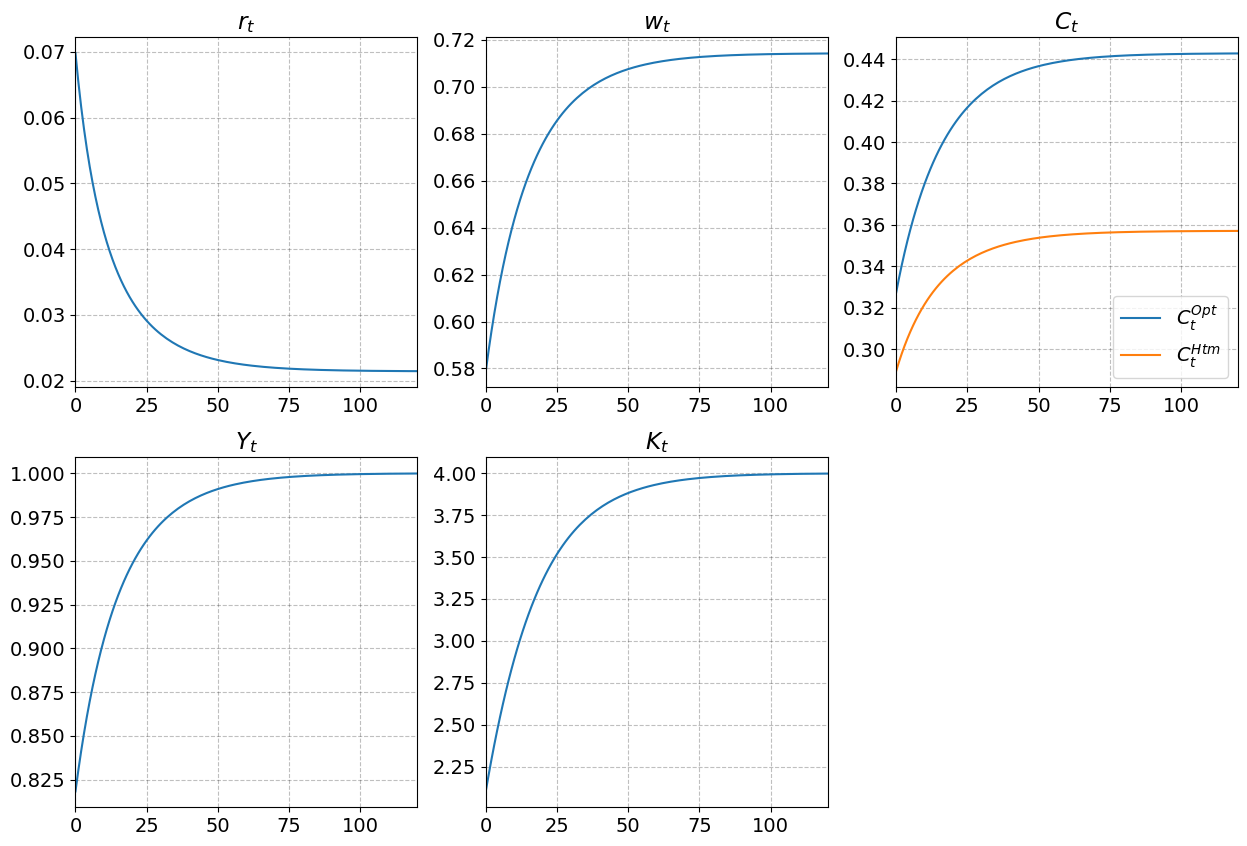

In [136]:
model.big_plot()

**Economic intution:** 

Solving the model with $K_{t-1}$ initially being out of steady state (50 pct. of steady state) yields the transition paths above. Capital grows as households save more, $A_t \uparrow$, and investments increase, $I_t \uparrow$. This follows from the Euler equation in which marginal utility today must equal the discounted marginal utility tomorrow. The trade off is that less consumption today allows for more consumption tomorrow. Because of a greater production input, $K_{t-1} \uparrow$, production grows, $Y_t \uparrow$, allowing for more consumption, $C_t \uparrow$. The return on capital decreases, $r_t \downarrow$, due to law of diminishing returns. However, the wage increases, $w_t \uparrow$, because growing capital makes the workforce $L_t$ increasingly more productive. <br>

Since the hand-to-mouth households cannot save, $A_t^{Htm} = 0$, one would expect that the convergence to steady state takes longer as the share of hand to mouth households grows, $(1-\lambda) \uparrow$. I test this hypothesis below, where I loop through three different values of $\lambda$. As expected the convergence gets slower as the share of $Htm$ households grow. This is because the total savings rate becomes lower, and therefore capital accumulates more slowly.

In addition, the plot shows how different values of $\lambda$ affect the consumption composition. For instance, for high values of $\lambda$, the share of $Htm$ households is low, and therefore $C_t^{Opt}$ makes up the greatest part of the total consumption, $C_t$. 

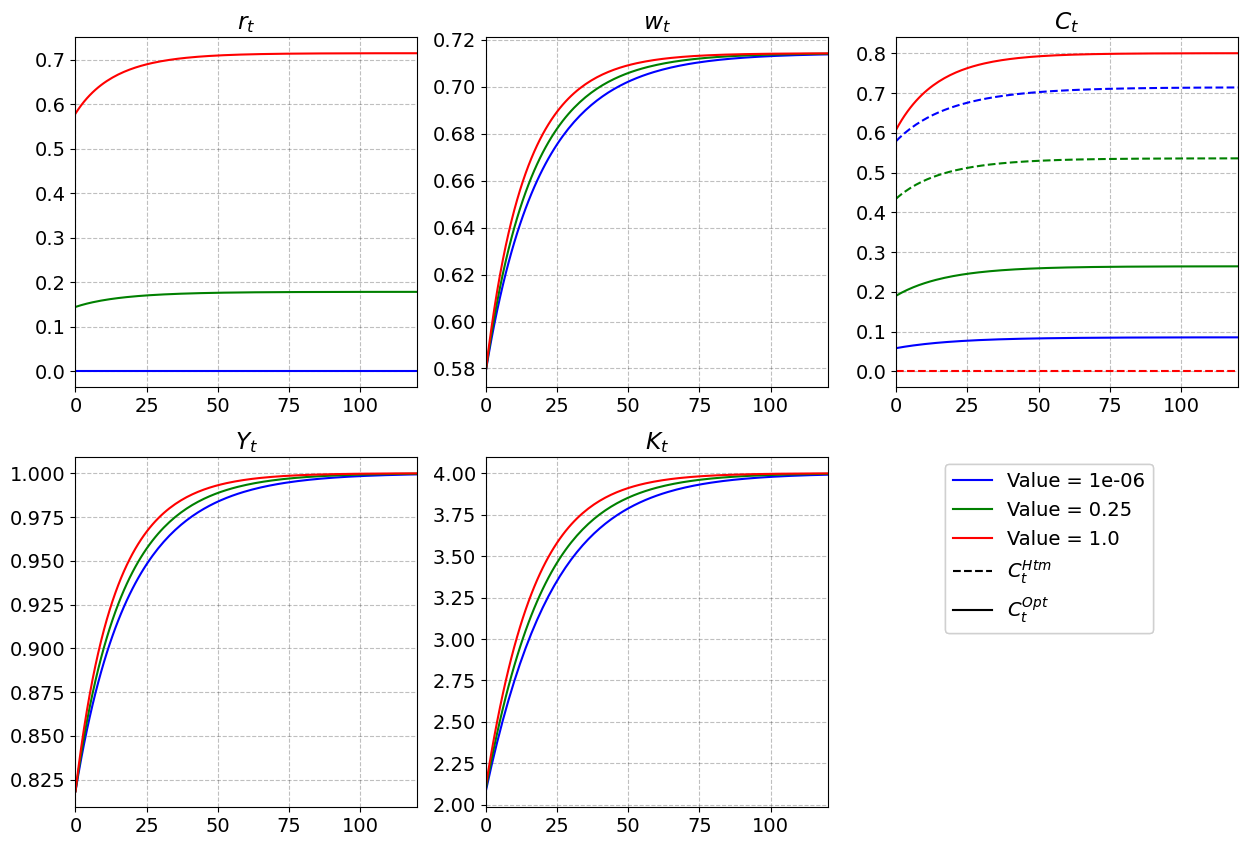

In [144]:
# values of lambda
values = [0.000001,0.25,1.0]

# solve model for each value of lambda
model.simulate_and_plot('lambdaa',values)